In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [385]:
orgdata = pd.read_csv('House_Rent_Dataset.csv')
data = orgdata.copy()

In [386]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


<h2>Checking Null Values</h2>

In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Posted On         4746 non-null   object
 1   BHK               4746 non-null   int64 
 2   Rent              4746 non-null   int64 
 3   Size              4746 non-null   int64 
 4   Floor             4746 non-null   object
 5   Area Type         4746 non-null   object
 6   Area Locality     4746 non-null   object
 7   City              4746 non-null   object
 8   Furnishing        4746 non-null   object
 9   Tenant Preferred  4746 non-null   object
 10  Bathroom          4746 non-null   int64 
 11  Point of Contact  4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


<Axes: >

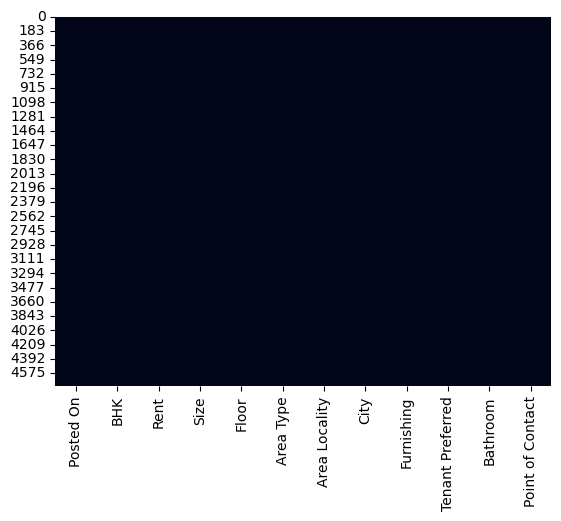

In [388]:
sns.heatmap(data.isnull(),cbar=False)

<h2>Data Cleaning</h2>

In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Posted On         4746 non-null   object
 1   BHK               4746 non-null   int64 
 2   Rent              4746 non-null   int64 
 3   Size              4746 non-null   int64 
 4   Floor             4746 non-null   object
 5   Area Type         4746 non-null   object
 6   Area Locality     4746 non-null   object
 7   City              4746 non-null   object
 8   Furnishing        4746 non-null   object
 9   Tenant Preferred  4746 non-null   object
 10  Bathroom          4746 non-null   int64 
 11  Point of Contact  4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [390]:
data['Floor'] = data['Floor'].str.replace('Ground','0')
data['Floor'] = data['Floor'].str.replace('Upper Basement','-1')
data['Floor'] = data['Floor'].str.replace('Lower Basement','-2')
data['Floor_No'] = data['Floor'].str.extract('(-[0-9]|[0-9])')
data['Total_Floors'] = data['Floor'].str.extract('(\s+[0-9])')
data['Total_Floors'] = data['Total_Floors'].fillna(data['Floor_No'])
data['Floor_No'] = data['Floor_No'].astype(int)
data['Total_Floors'] = data['Total_Floors'].astype(int)

In [391]:
data.drop(columns=['Posted On','Floor','Area Locality'],inplace=True,axis=1)

In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BHK               4746 non-null   int64 
 1   Rent              4746 non-null   int64 
 2   Size              4746 non-null   int64 
 3   Area Type         4746 non-null   object
 4   City              4746 non-null   object
 5   Furnishing        4746 non-null   object
 6   Tenant Preferred  4746 non-null   object
 7   Bathroom          4746 non-null   int64 
 8   Point of Contact  4746 non-null   object
 9   Floor_No          4746 non-null   int64 
 10  Total_Floors      4746 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 408.0+ KB


In [393]:
for i in data:
    print('Value Counts of ',i)
    v = data[i].value_counts()
    print(v)
    print('\n')

Value Counts of  BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64


Value Counts of  Rent
15000    275
10000    248
12000    238
20000    175
8000     162
        ... 
4600       1
79500      1
76000      1
45002      1
5800       1
Name: Rent, Length: 243, dtype: int64


Value Counts of  Size
1000    240
600     225
800     220
1200    193
500     192
       ... 
2770      1
1252      1
904       1
721       1
855       1
Name: Size, Length: 615, dtype: int64


Value Counts of  Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64


Value Counts of  City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64


Value Counts of  Furnishing
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing, dtype: int64


Value Counts of  Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family    

<h2>Outlier Detection</h2>

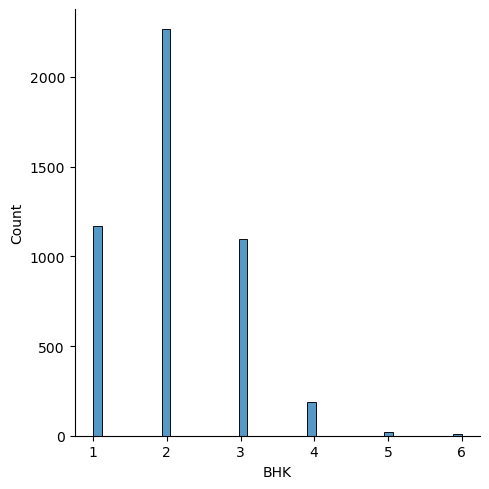

In [394]:
sns.displot(data['BHK'])

<Axes: >

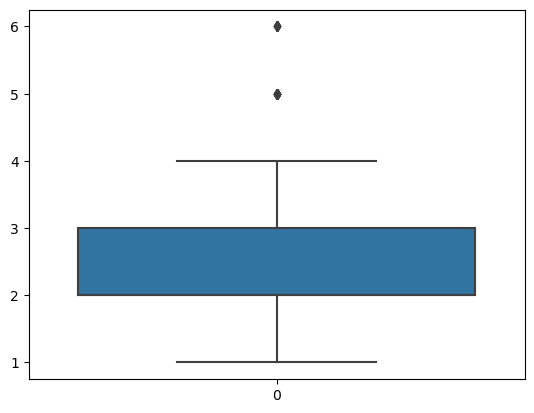

In [395]:
sns.boxplot(data['BHK'])

In [396]:
Q1 = np.percentile(data['BHK'],25,method='midpoint')
Q3 = np.percentile(data['BHK'],75,method='midpoint')
IQR = Q3-Q1
upper = Q3 + 1.5*(IQR)
lower = Q1 - 1.5*(IQR)
data.drop(data[(data['BHK'] > upper)].index,inplace=True,axis=0)
data.drop(data[(data['BHK'] < lower)].index,inplace=True,axis=0)

<Axes: >

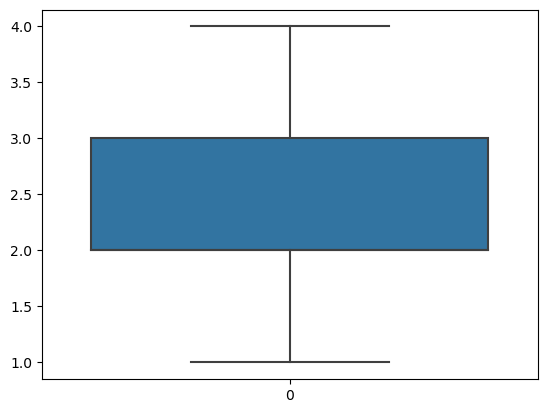

In [397]:
sns.boxplot(data['BHK'])

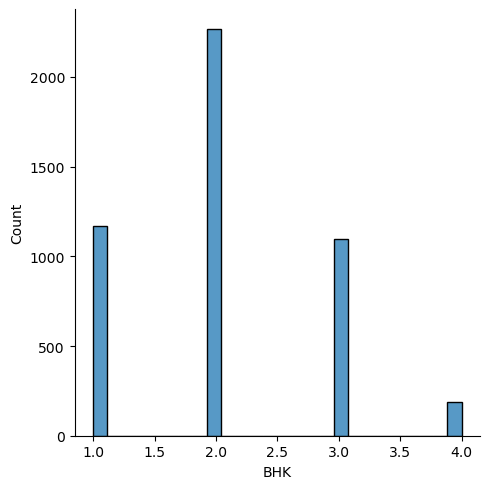

In [398]:
sns.displot(data['BHK'])

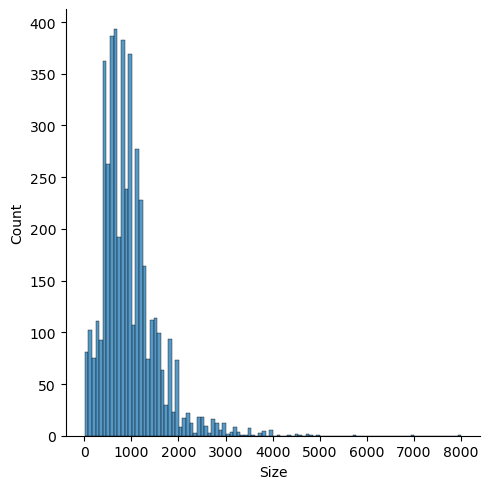

In [399]:
sns.displot(data['Size'])

<Axes: >

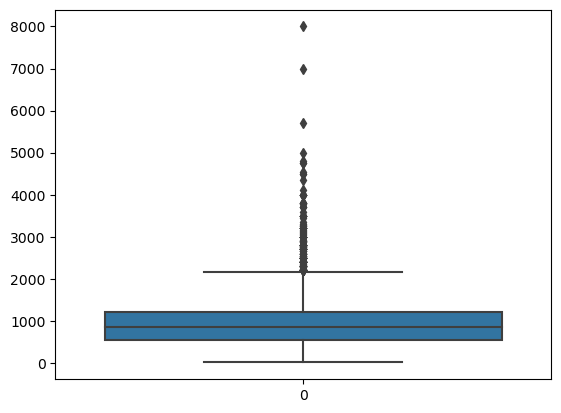

In [400]:
sns.boxplot(data['Size'])

In [401]:
Q1 = np.percentile(data['Size'],25,method='midpoint')
Q3 = np.percentile(data['Size'],75,method='midpoint')
IQR = Q3-Q1
upper = Q3 + 1.5*(IQR)
lower = Q1 - 1.5*(IQR)
data.drop(data[(data['Size'] >= upper)].index,inplace=True,axis=0)
data.drop(data[(data['Size'] <= lower)].index,inplace=True,axis=0)

<Axes: >

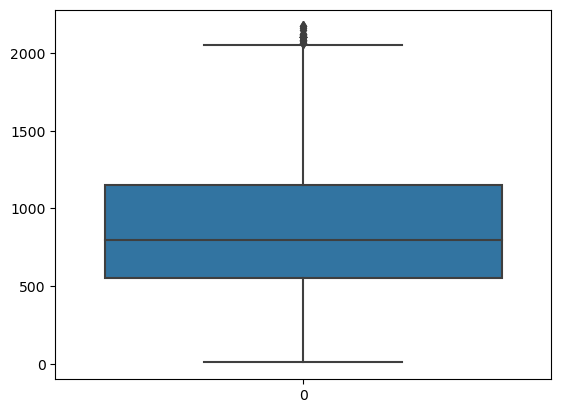

In [402]:
sns.boxplot(data['Size'])

In [403]:
data = data.drop(data[data['Size'] <= 120].index)

<Axes: >

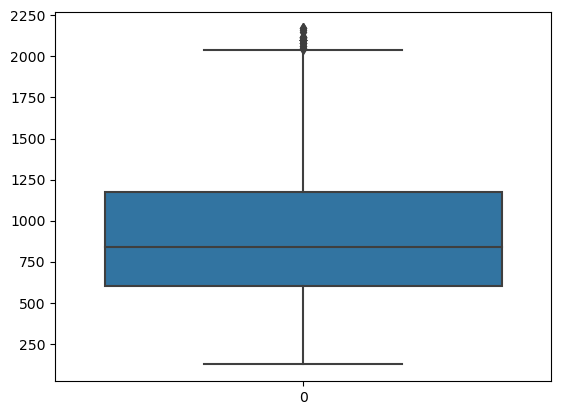

In [404]:
sns.boxplot(data['Size'])

<Axes: >

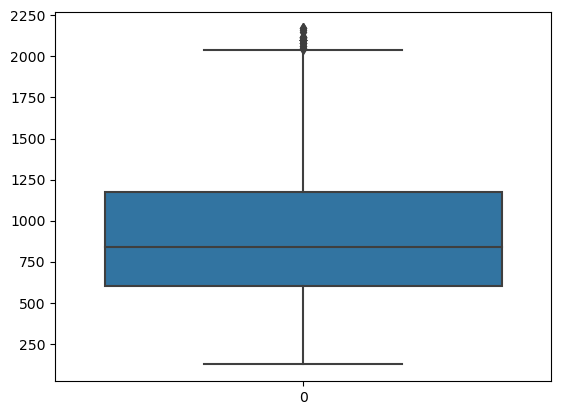

In [405]:
sns.boxplot(data['Size'])

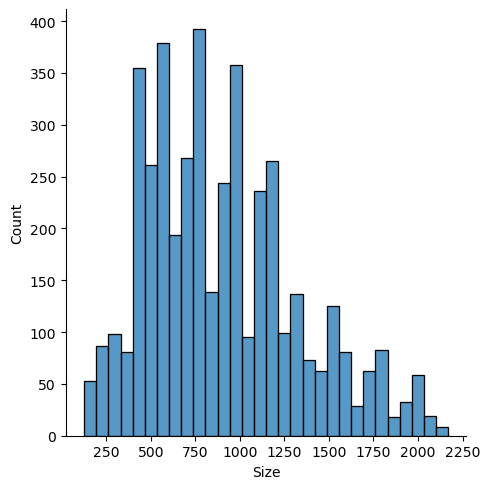

In [406]:
sns.displot(data['Size'])

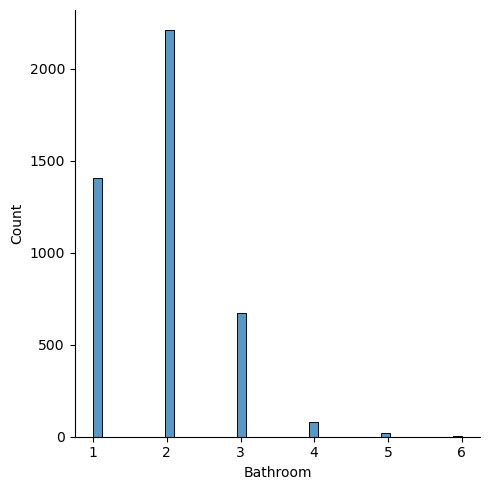

In [407]:
sns.displot(data['Bathroom'])

<Axes: >

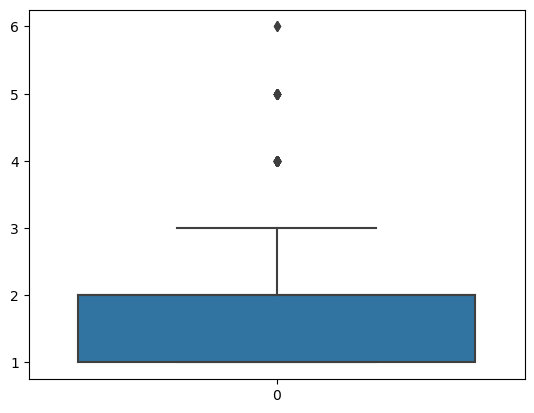

In [408]:
sns.boxplot(data['Bathroom'])

In [409]:
Q1 = np.percentile(data['Bathroom'],25,method='midpoint')
Q3 = np.percentile(data['Bathroom'],75,method='midpoint')
IQR = Q3-Q1
upper = Q3 + 1.5*(IQR)
lower = Q1 - 1.5*(IQR)
data.drop(data[(data['Bathroom'] >= upper)].index,inplace=True,axis=0)
data.drop(data[(data['Bathroom'] <= lower)].index,inplace=True,axis=0)

<Axes: >

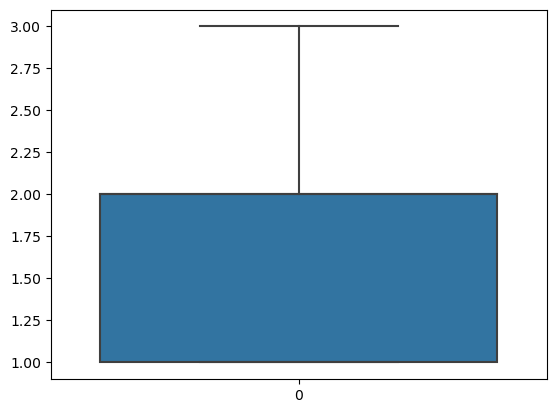

In [410]:
sns.boxplot(data['Bathroom'])

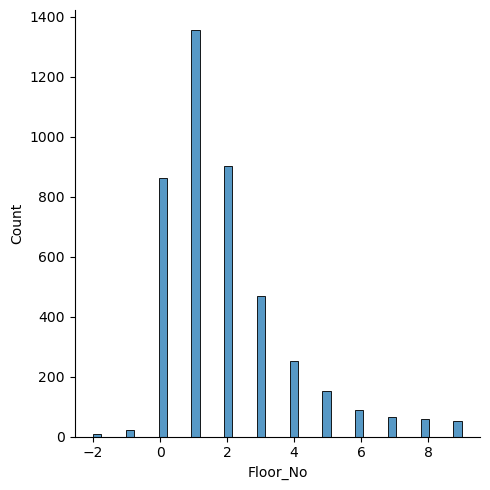

In [411]:
sns.displot(data['Floor_No'])

In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4290 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BHK               4290 non-null   int64 
 1   Rent              4290 non-null   int64 
 2   Size              4290 non-null   int64 
 3   Area Type         4290 non-null   object
 4   City              4290 non-null   object
 5   Furnishing        4290 non-null   object
 6   Tenant Preferred  4290 non-null   object
 7   Bathroom          4290 non-null   int64 
 8   Point of Contact  4290 non-null   object
 9   Floor_No          4290 non-null   int64 
 10  Total_Floors      4290 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 531.2+ KB


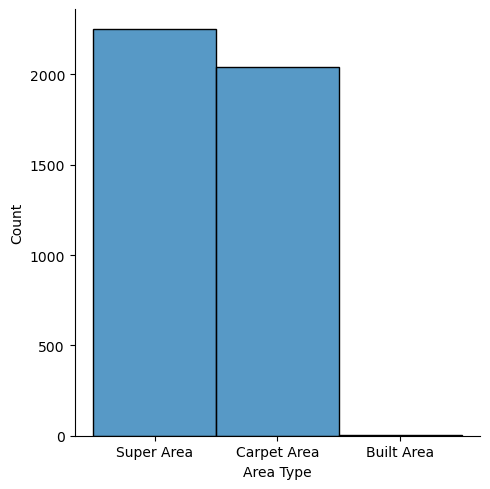

In [413]:
sns.displot(data['Area Type'])

In [414]:
data = data[~data['Area Type'].str.contains('Built Area')]

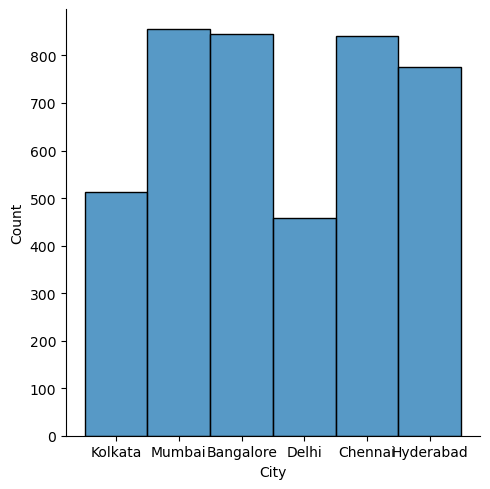

In [415]:
sns.displot(data['City'])

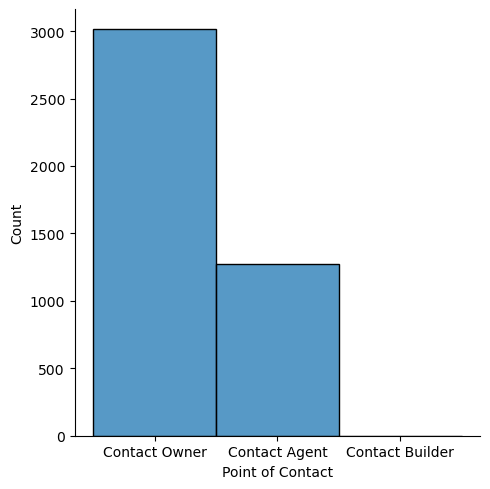

In [416]:
sns.displot(data['Point of Contact'])
#sns.boxplot(x = 'Point of Contact', y = 'Rent', data = data)

In [417]:
data = data[~data['Point of Contact'].str.contains('Contact Builder')]


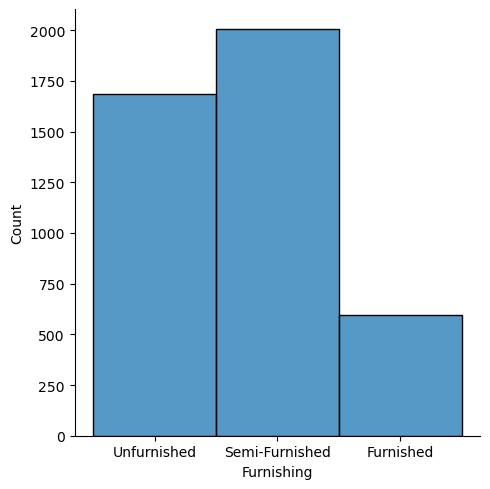

In [418]:
sns.displot(data['Furnishing'])

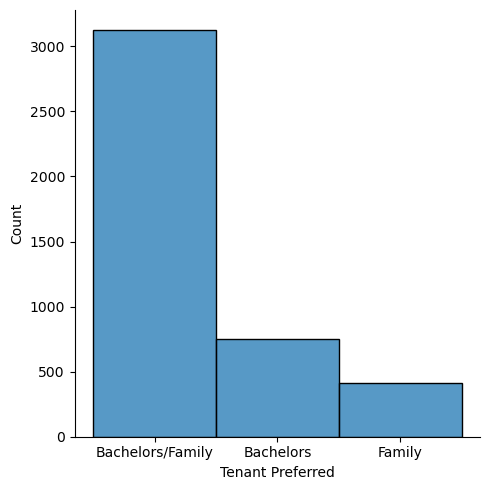

In [419]:
sns.displot(data['Tenant Preferred'])

In [420]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [421]:
columns = ['Area Type','City','Furnishing','Tenant Preferred','Point of Contact']
for col in columns:
    data = one_hot_encode(data, col)

In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4287 entries, 0 to 4745
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   BHK               4287 non-null   int64
 1   Rent              4287 non-null   int64
 2   Size              4287 non-null   int64
 3   Bathroom          4287 non-null   int64
 4   Floor_No          4287 non-null   int64
 5   Total_Floors      4287 non-null   int64
 6   Super Area        4287 non-null   uint8
 7   Chennai           4287 non-null   uint8
 8   Delhi             4287 non-null   uint8
 9   Hyderabad         4287 non-null   uint8
 10  Kolkata           4287 non-null   uint8
 11  Mumbai            4287 non-null   uint8
 12  Semi-Furnished    4287 non-null   uint8
 13  Unfurnished       4287 non-null   uint8
 14  Bachelors/Family  4287 non-null   uint8
 15  Family            4287 non-null   uint8
 16  Contact Owner     4287 non-null   uint8
dtypes: int64(6), uint8(11)
memory usa

In [423]:
c = data.corr()['Rent'][:].sort_values()
# for i in c:
#     if(abs(i) > 0.3):
#         print(i)
print(c)

Contact Owner      -0.489028
Super Area         -0.314316
Kolkata            -0.167532
Unfurnished        -0.165947
Hyderabad          -0.137756
Chennai            -0.125442
Bachelors/Family   -0.102253
Delhi              -0.025739
Semi-Furnished      0.013263
Total_Floors        0.041006
Family              0.088913
Floor_No            0.284320
Size                0.293654
BHK                 0.357174
Bathroom            0.433024
Mumbai              0.546483
Rent                1.000000
Name: Rent, dtype: float64


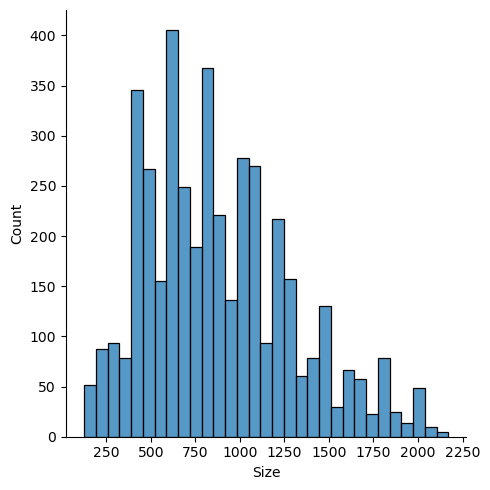

In [424]:
sns.displot(data['Size'])

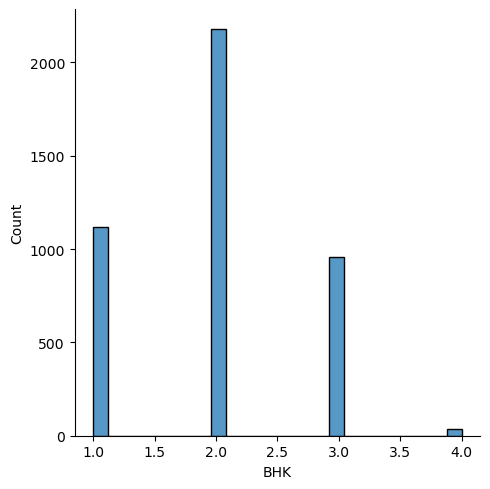

In [425]:
sns.displot(data['BHK'])

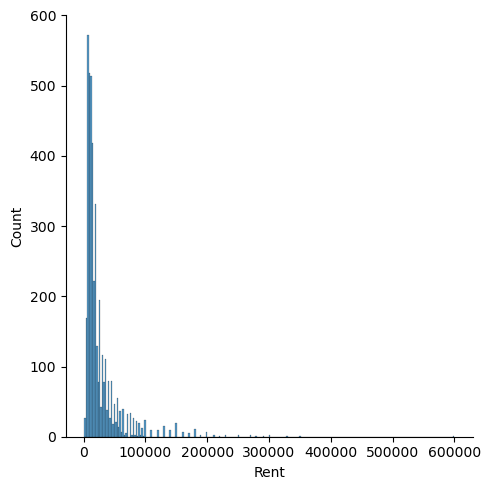

In [426]:
sns.displot(data['Rent'])

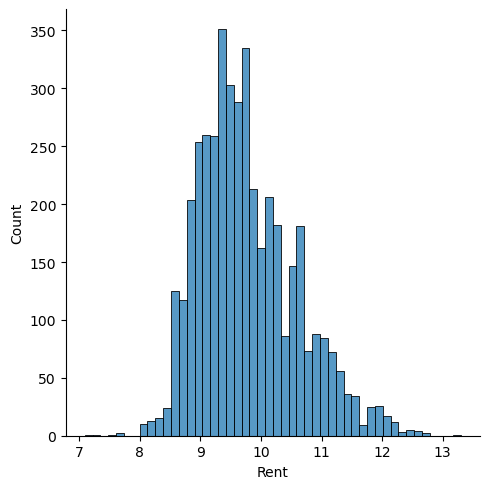

In [427]:
data['Rent'] = np.log1p(data['Rent'])
sns.displot(data['Rent'])

In [428]:
print(data['Rent'])

0        9.210440
1        9.903538
2        9.741027
3        9.210440
4        8.922792
          ...    
4741     9.615872
4742    10.275086
4743    10.463132
4744    10.714440
4745     9.615872
Name: Rent, Length: 4287, dtype: float64


<Axes: >

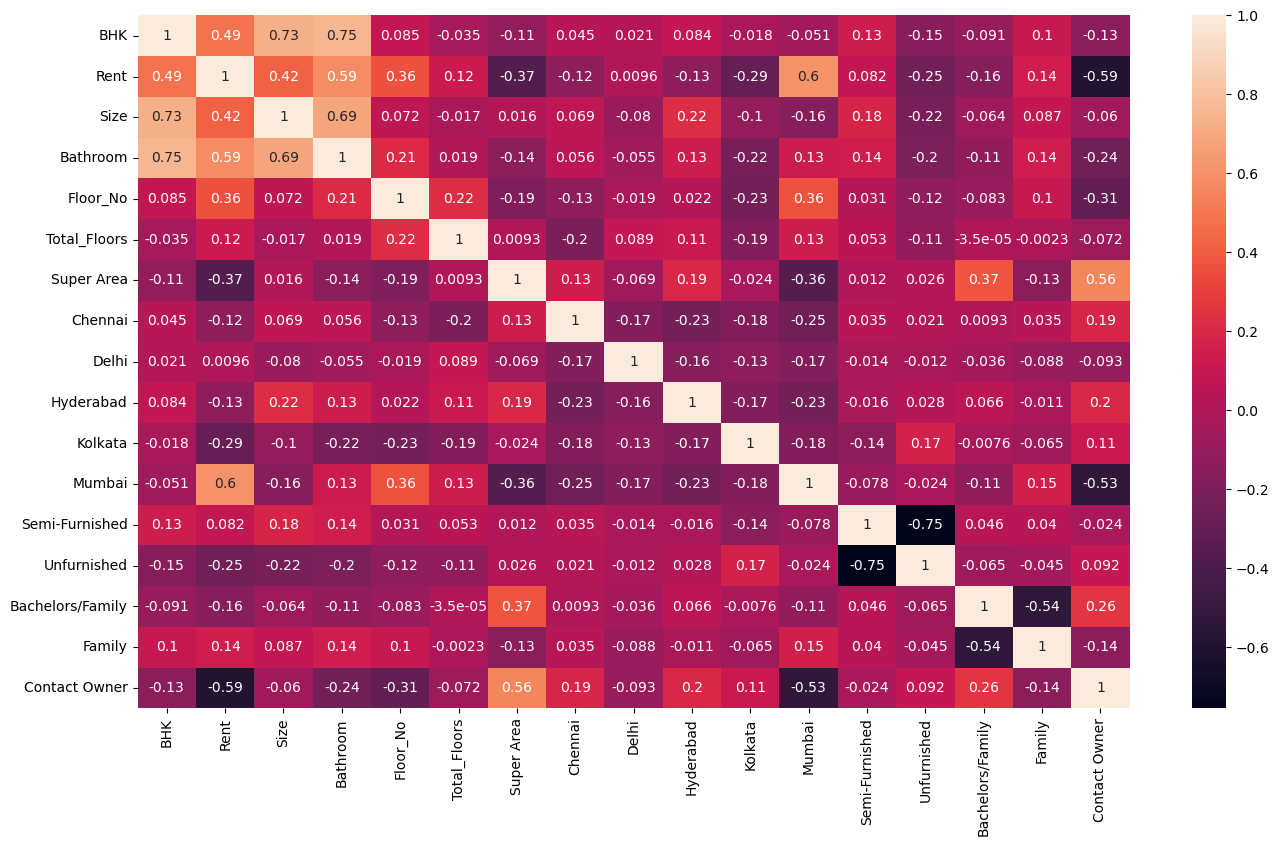

In [429]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)

In [430]:
c = data.corr()['Rent'][:].sort_values()
# for i in c:
#     if(abs(i) > 0.3):
#         print(i)
print(c)

Contact Owner      -0.590515
Super Area         -0.372037
Kolkata            -0.289098
Unfurnished        -0.246349
Bachelors/Family   -0.161782
Hyderabad          -0.128043
Chennai            -0.124537
Delhi               0.009618
Semi-Furnished      0.082460
Total_Floors        0.118463
Family              0.137640
Floor_No            0.361804
Size                0.423620
BHK                 0.485220
Bathroom            0.588777
Mumbai              0.604795
Rent                1.000000
Name: Rent, dtype: float64


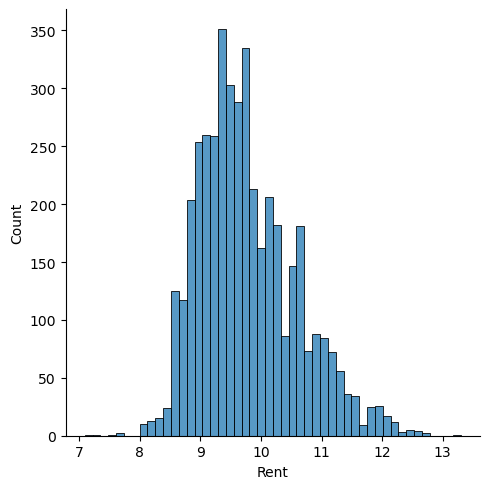

In [431]:
sns.displot(data['Rent'])

In [432]:
y = data[['Rent']]
x = data[['Size','Bathroom','BHK','Mumbai','Contact Owner']]

In [433]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)
# x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=20)

In [434]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

print('mse train',mean_squared_error((y_train),(reg.predict(x_train)),squared=False))
print('mse test',mean_squared_error((y_test),(reg.predict(x_test)),squared=False))
print('mae train',mean_absolute_error((y_train),(reg.predict(x_train))))
print('mae test',mean_absolute_error((y_test),(reg.predict(x_test))))
print('r2 score train',r2_score(y_train,reg.predict(x_train)))
print('r2 score test',r2_score(y_test,reg.predict(x_test)))

mse train 0.4109653249059436
mse test 0.43776506361586787
mae train 0.3060612518354468
mae test 0.33227062958985687
r2 score train 0.7374181095922563
r2 score test 0.7259265191563578


In [435]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=15)
dt.fit(x_train,y_train)
print('mse train',mean_squared_error((y_train),(dt.predict(x_train)),squared=False))
print('mse test',mean_squared_error((y_test),(dt.predict(x_test)),squared=False))
print('mae train',mean_absolute_error((y_train),(dt.predict(x_train))))
print('mae test',mean_absolute_error((y_test),(dt.predict(x_test))))
print('r2 score train',r2_score(y_train,dt.predict(x_train)))
print('r2 score test',r2_score(y_test,dt.predict(x_test)))

mse train 0.3223613600343042
mse test 0.47258074563346064
mae train 0.21462171065561514
mae test 0.3573990102890824
r2 score train 0.8384375726397248
r2 score test 0.6805985646203869


In [436]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf=1,max_features='sqrt',max_depth=10,min_samples_split=2,random_state=15,n_estimators=500)
rf.fit(x_train,y_train)
print('mse train',mean_squared_error((y_train),(rf.predict(x_train)),squared=False))
print('mse test',mean_squared_error((y_test),(rf.predict(x_test)),squared=False))
print('mae train',mean_absolute_error((y_train),(rf.predict(x_train))))
print('mae test',mean_absolute_error((y_test),(rf.predict(x_test))))
print('r2 score train',r2_score(y_train,rf.predict(x_train)))
print('r2 score test',r2_score(y_test,rf.predict(x_test)))

/tmp/ipykernel_8076/2274049624.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


mse train 0.34580612262381266
mse test 0.4280247038512251
mae train 0.2573498469651646
mae test 0.32636170977226
r2 score train 0.8140827155099505
r2 score test 0.737987212185807


In [437]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Load the Boston Housing dataset

# Define the decision tree model
dt = DecisionTreeRegressor(random_state=42)

# Define the hyper-parameter grid to search over
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Define the cross-validation strategy
cv = 5

# Create a Grid Search object with the defined parameters
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=cv, n_jobs=-1)

# Fit the Grid Search object to the data
grid_search.fit(x, y)

# Print the best hyper-parameters and the corresponding score
print("Best hyper-parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
y_pred = grid_search.predict(x_train)
y_pred_tst = grid_search.predict(x_test)

# Calculate the RMSE

print("Best hyperparameters: ", param_grid)
# print("RMSE: ", rmse2)
# print("RMSE Test",rmse)

print('mse train',mean_squared_error((y_train),(grid_search.predict(x_train)),squared=False))
print('mse test',mean_squared_error((y_test),(grid_search.predict(x_test)),squared=False))
print('mae train',mean_absolute_error((y_train),(grid_search.predict(x_train))))
print('mae test',mean_absolute_error((y_test),(grid_search.predict(x_test))))
print('r2 score train',r2_score(y_train,grid_search.predict(x_train)))
print('r2 score test',r2_score(y_test,grid_search.predict(x_test)))

Best hyper-parameters:  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score:  0.6268386612806565
Best hyperparameters:  {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
mse train 0.37983206385796553
mse test 0.39028343173724744
mae train 0.2834401012831989
mae test 0.30243131960503167
r2 score train 0.7756956699963473
r2 score test 0.7821562786739031


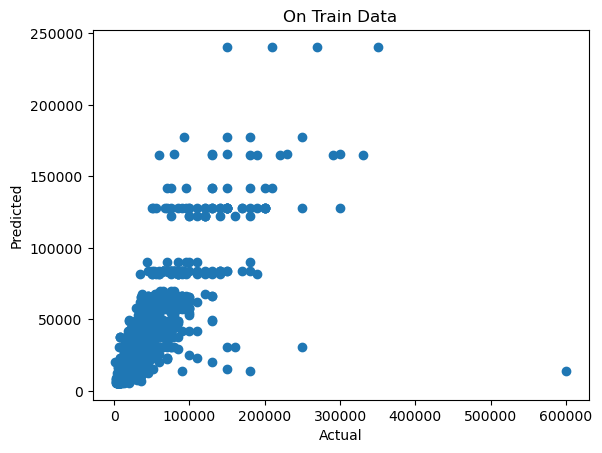

In [438]:
plt.scatter(np.expm1(y_train),np.expm1(y_pred))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('On Train Data')
plt.show()

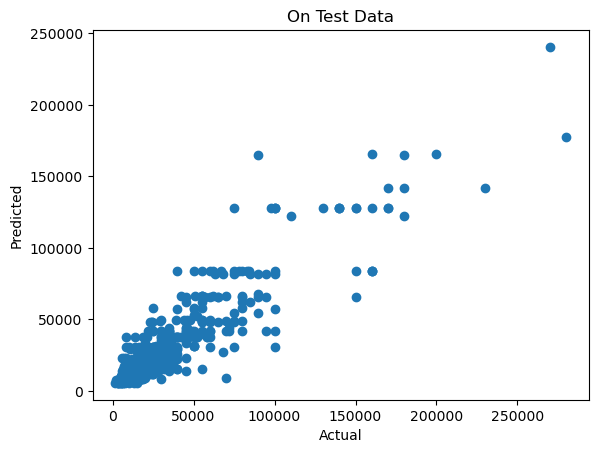

In [439]:
plt.scatter(np.expm1(y_test),np.expm1(y_pred_tst))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('On Test Data')
plt.show()

In [440]:
import pickle

# create a model object
filename = 'model.pkl'
pickle.dump(rf, open(filename, 'wb'))
